In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)
plt.rc('axes', unicode_minus=False)

In [2]:
# 데이터 읽기
house = pd.read_csv('./work/empty_train.csv')
house_answer = pd.read_csv('./work/empty_test.csv')

In [3]:
print(len(house), len(house_answer))

615 69


In [4]:
# 결측치 확인
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row Labels        615 non-null    object 
 1   연도                615 non-null    int64  
 2   도시지역면적            615 non-null    int64  
 3   비만율               615 non-null    float64
 4   유치원 원아수           615 non-null    int64  
 5   초등학교 학생수          615 non-null    int64  
 6   토지거래면적            615 non-null    int64  
 7   혼인건수              615 non-null    int64  
 8   노인 천명당 노인여가복지시설수  615 non-null    float64
 9   1인가구비율            615 non-null    float64
 10  등록외국인 현황          615 non-null    int64  
 11  유아 천명당 보육시설수      615 non-null    float64
 12  지가변동률             615 non-null    float64
 13  출생아수              615 non-null    int64  
 14  학급당 학생수           615 non-null    float64
 15  대학교수              615 non-null    int64  
 16  독거노인가구비율          615 non-null    float64
 1

In [5]:
house.describe() 

,연도,도시지역면적,비만율,유치원 원아수,초등학교 학생수,토지거래면적,혼인건수,노인 천명당 노인여가복지시설수,1인가구비율,등록외국인 현황,...,대학교수,독거노인가구비율,유치원수,인구 십만명당 문화기반시설수,인구 천명당 사설학원수,주택수,초등학교수,평균연령,빈집수,빈집지수
count,615.000000,6.150000e+02,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,...,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,2016.990244,7.553134e+07,29.423577,3005.549593,11664.279675,9370.665041,1153.938211,9.939382,30.914959,5152.933333,...,1.481301,10.598699,39.299187,10.054683,1.254504,74914.190244,26.339837,44.442764,5573.417886,8.812093
std,0.817103,9.273621e+07,3.711749,3525.623109,12659.509361,8224.808619,1234.181823,7.765677,5.172954,7454.197877,...,1.818085,5.791336,34.584904,9.237033,0.578083,67264.496865,18.564965,4.753772,4717.203969,4.441012
min,2016.000000,3.710000e+06,18.300000,90.000000,290.000000,69.000000,46.000000,1.270000,17.700000,145.000000,...,0.000000,2.900000,4.000000,0.970000,0.140000,2964.000000,4.000000,35.800000,25.000000,0.205948
25%,2016.000000,2.229900e+07,27.000000,418.500000,2143.000000,1728.500000,208.000000,2.830000,27.500000,887.000000,...,0.000000,5.800000,16.000000,3.395000,0.840000,23077.500000,14.000000,40.700000,2512.500000,5.189648
50%,2017.000000,3.901304e+07,29.200000,1681.000000,6628.000000,8769.000000,723.000000,7.910000,31.500000,2248.000000,...,1.000000,8.500000,28.000000,6.980000,1.180000,51096.000000,21.000000,43.000000,4180.000000,9.197471
75%,2018.000000,8.621196e+07,31.800000,4351.500000,16729.000000,14551.000000,1744.000000,15.705000,34.400000,5925.500000,...,2.000000,15.050000,49.000000,14.432500,1.560000,108753.000000,32.000000,48.450000,6980.000000,12.195927
max,2018.000000,5.953337e+08,41.000000,21223.000000,69067.000000,75296.000000,7765.000000,32.470000,47.600000,56787.000000,...,12.000000,24.700000,198.000000,74.860000,4.170000,365222.000000,113.000000,56.400000,32603.000000,31.467324


In [6]:
columns = house.columns
print(columns)
# 지역특성 - 연도, 도시지역면적, 토지거래면적, 지가변동률, 주택수, 초등학교수, 빈집수, 유치원수, 유아 천명당 보육시설수, 노인 천명당 노인여가복지시설수, 인구 십만명당 문화기반시설수, 인구 천명당 사설학원수
# 인구관련 - 유치원 원아수, 초등학교 학생수, 혼인건수, 1인가구비율, 등록외국인 현황, 출생아수, 학급당 학생수, 대학교수, 독거노인가구비율, 평균연령

Index(['Row Labels', '연도', '도시지역면적', '비만율', '유치원 원아수', '초등학교 학생수', '토지거래면적',
       '혼인건수', '노인 천명당 노인여가복지시설수', '1인가구비율', '등록외국인 현황', '유아 천명당 보육시설수',
       '지가변동률', '출생아수', '학급당 학생수', '대학교수', '독거노인가구비율', '유치원수',
       '인구 십만명당 문화기반시설수', '인구 천명당 사설학원수', '주택수', '초등학교수', '평균연령', '빈집수',
       '빈집지수'],
      dtype='object')


In [7]:
col = house.columns[1:]
col

Index(['연도', '도시지역면적', '비만율', '유치원 원아수', '초등학교 학생수', '토지거래면적', '혼인건수',
       '노인 천명당 노인여가복지시설수', '1인가구비율', '등록외국인 현황', '유아 천명당 보육시설수', '지가변동률',
       '출생아수', '학급당 학생수', '대학교수', '독거노인가구비율', '유치원수', '인구 십만명당 문화기반시설수',
       '인구 천명당 사설학원수', '주택수', '초등학교수', '평균연령', '빈집수', '빈집지수'],
      dtype='object')

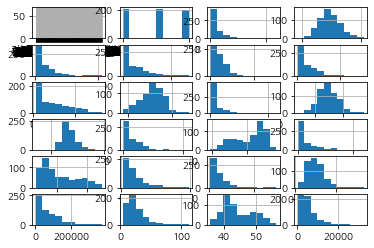

In [8]:
for i, name in enumerate(col) :
    ax = plt.subplot(6, 4, i + 1)
    house[house.columns[i]].hist(ax=ax)

<AxesSubplot:xlabel='빈집지수', ylabel='유치원수'>

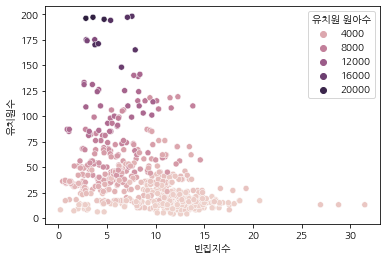

In [9]:
sns.scatterplot(x = '빈집지수', y = '유치원수', hue = '유치원 원아수', data=house)

In [10]:
x_train, y_train = house[columns[1:-1]], house[columns[-1]]
house[columns[-1]]

0       2.186650
1      11.267068
2      12.040734
3       7.516286
4      11.590118
         ...    
610    12.674924
611     9.532933
612     9.196235
613    13.233739
614    14.798316
Name: 빈집지수, Length: 615, dtype: float64

In [11]:
# 데이터 전처리
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)

In [12]:
ans_columns = house_answer.columns

In [13]:
# 테스트 데이터셋
x_test = house_answer[ans_columns[1:]]
x_test_sc = sc.transform(x_test)

# LinearRegression

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
lr = model.fit(x_train_sc, y_train)

In [15]:
y_pred = lr.predict(x_test_sc)
house_answer['빈집지수'] = y_pred

In [16]:
house_answer.to_csv('./linear_answer_이나겸.csv', index=False, encoding='utf-8-sig') # 한글 저장

In [17]:
print(lr.score(x_train_sc, y_train))
print(lr.score(x_test_sc, y_pred))

0.795280140637058
1.0


In [18]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_pred, squared = False)

0.0

# RandomForestRegressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

rnd_model = RandomForestRegressor(
    n_estimators=100,
    max_leaf_nodes=16,
    n_jobs=-1)
rnd = rnd_model.fit(x_train_sc, y_train)

In [20]:
y_pred = rnd.predict(x_test_sc)
house_answer['빈집지수'] = y_pred

In [21]:
print(rnd.score(x_train_sc, y_train))
print(rnd.score(x_test_sc, y_pred))

0.9062743139453964
1.0


In [22]:
house_answer['빈집지수'] = y_pred
house_answer.to_csv('./randomforest_answer_이나겸.csv', index=False, encoding='utf-8-sig') # 한글 저장

# KNeighborsRegressor

In [23]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors = 3)
knn_model.fit(x_train_sc, y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
y_pred = knn_model.predict(x_test_sc)
house_answer['빈집지수'] = y_pred

In [25]:
print(knn_model.score(x_train_sc, y_train))
print(knn_model.score(x_test_sc, y_pred))

0.9189412921821464
1.0


In [26]:
house_answer['빈집지수'] = y_pred
house_answer.to_csv('./knn_answer_이나겸.csv', index=False, encoding='utf-8-sig') # 한글 저장

# DecisionTreeRegressor

In [27]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=10).fit(x_train_sc, y_train)

In [28]:
y_pred = dtr.predict(x_test_sc)
house_answer['빈집지수'] = y_pred

In [29]:
print(dtr.score(x_train_sc, y_train))
print(dtr.score(x_test_sc, y_pred))

0.9841682632756542
1.0


In [30]:
house_answer['빈집지수'] = y_pred
house_answer.to_csv('./decisionTree_answer_이나겸.csv', index=False, encoding='utf-8-sig') # 한글 저장

In [31]:
feature_importance = pd.DataFrame(dtr.feature_importances_.reshape((1, -1)), columns=columns[1:-1], index=['feature_importance'])
print(feature_importance)

                          연도   도시지역면적       비만율   유치원 원아수  초등학교 학생수    토지거래면적  \
feature_importance  0.000128  0.00348  0.001329  0.001823  0.014712  0.003072   

                        혼인건수  노인 천명당 노인여가복지시설수    1인가구비율  등록외국인 현황  ...  \
feature_importance  0.013413          0.097097  0.045154  0.017715  ...   

                     학급당 학생수      대학교수  독거노인가구비율      유치원수  인구 십만명당 문화기반시설수  \
feature_importance  0.049545  0.002018  0.460843  0.001301         0.018288   

                    인구 천명당 사설학원수       주택수     초등학교수      평균연령      빈집수  
feature_importance      0.007042  0.009829  0.015597  0.002611  0.19349  

[1 rows x 23 columns]


<AxesSubplot:xlabel='빈집지수', ylabel='초등학교수'>

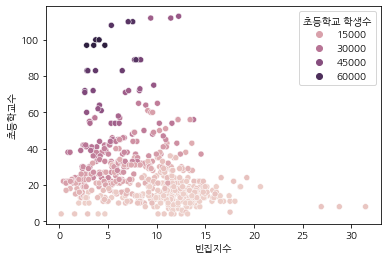

In [32]:
sns.scatterplot(x = '빈집지수', y = '초등학교수', hue = '초등학교 학생수', data=house)

<AxesSubplot:xlabel='빈집지수', ylabel='노인 천명당 노인여가복지시설수'>

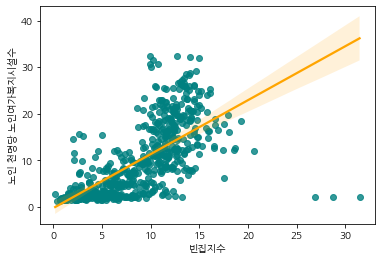

In [33]:
sns.regplot(x='빈집지수', y='노인 천명당 노인여가복지시설수', data=house,
           line_kws={'color':'orange'}, scatter_kws={'color':'teal'})

<AxesSubplot:xlabel='빈집지수', ylabel='독거노인가구비율'>

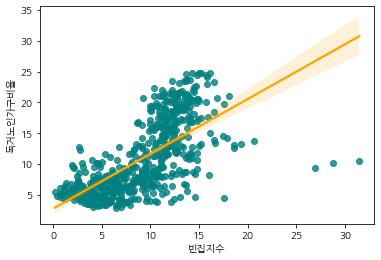

In [34]:
sns.regplot(x='빈집지수', y='독거노인가구비율', data=house,
           line_kws={'color':'orange'}, scatter_kws={'color':'teal'})

<AxesSubplot:xlabel='빈집지수', ylabel='도시지역면적'>

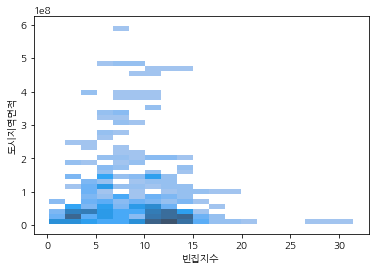

In [35]:
sns.histplot(x=house['빈집지수'], y=house['도시지역면적'])

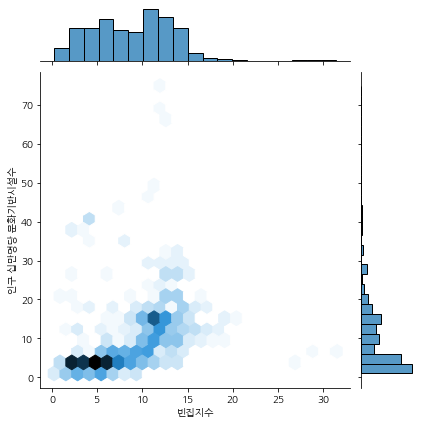

In [36]:
sns.jointplot(x=house['빈집지수'], y=house['인구 십만명당 문화기반시설수'], kind = 'hex')

<AxesSubplot:xlabel='빈집지수', ylabel='등록외국인 현황'>

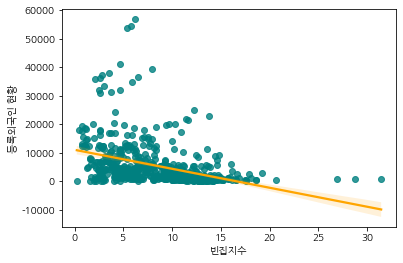

In [37]:
sns.regplot(x='빈집지수', y='등록외국인 현황', data=house,
           line_kws={'color':'orange'}, scatter_kws={'color':'teal'})

In [38]:
from sklearn.tree import export_graphviz

# tree.dot 파일 생성
export_graphviz(dtr, out_file="tree.dot",
                class_names=columns[-1], feature_names=columns[1:-1],
                impurity=True, filled=True)

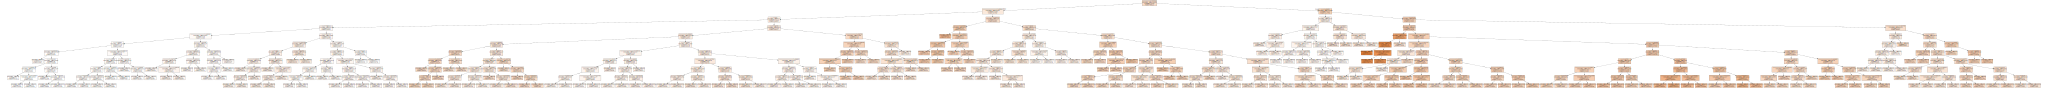

In [39]:
import graphviz

# tree.dot 파일을 Graphviz로 읽어 Jupyter Notebook에서 시각화 
with open("tree.dot", "rt", encoding = 'UTF8') as f:
    dot_graph = f.read()
src = graphviz.Source(dot_graph)
src

In [40]:
import joblib

joblib.dump(sc, '빈집지수_scaler.pkl')
joblib.dump(dtr, '빈집지수_log_model.pkl')

['빈집지수_log_model.pkl']

In [41]:
scaler = joblib.load('빈집지수_scaler.pkl')
model = joblib.load('빈집지수_log_model.pkl')

y_pred_re = model.predict(x_test_sc)
print(y_pred == y_pred_re)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


# Bagging

In [42]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [43]:
bag_model = BaggingRegressor(
    DecisionTreeRegressor(),  
    n_estimators = 100,        
    max_samples=0.7,           
    bootstrap = True,          
    n_jobs = -1
)

bag_model.fit(x_train_sc, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.7,
                 n_estimators=100, n_jobs=-1)

In [44]:
y_pred = bag_model.predict(x_test_sc)
house_answer['빈집지수'] = y_pred

In [45]:
print(bag_model.score(x_train_sc, y_train))
print(bag_model.score(x_test_sc, y_pred))

0.9653633556928003
1.0


In [46]:
house_answer['빈집지수'] = y_pred
house_answer.to_csv('./Bagging_answer_이나겸.csv', index=False, encoding='utf-8-sig') # 한글 저장

# ensemble

In [47]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import accuracy_score

In [48]:
# 기본(약한) 학습기 생성
bag_model = BaggingRegressor()
knn_model = KNeighborsRegressor()
dtr_model = DecisionTreeRegressor()

In [49]:
vote_model = VotingRegressor(
    estimators = [('bag', bag_model), ('knn', knn_model), ('dtr', dtr_model)],
)
vote_model.fit(x_train_sc, y_train)

VotingRegressor(estimators=[('bag', BaggingRegressor()),
                            ('knn', KNeighborsRegressor()),
                            ('dtr', DecisionTreeRegressor())])

In [50]:
y_pred = vote_model.predict(x_test_sc)
house_answer['빈집지수'] = y_pred

In [51]:
print(vote_model.score(x_train_sc, y_train))
print(vote_model.score(x_test_sc, y_pred))

0.9720078783683045
1.0


In [52]:
house_answer['빈집지수'] = y_pred
house_answer.to_csv('./ensemble_answer_이나겸.csv', index=False, encoding='utf-8-sig') # 한글 저장

# AdaBoostRegression 제출

In [53]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(
    DecisionTreeRegressor(), # 학습기 선택
    n_estimators = 3,         # 개수 지정
    learning_rate = 0.5,      # 크면 계수가 크게 바뀌고 작으면 작게 바뀐다. 뭐가 좋다는 것은 없다. 일반적으로 딥러닝은 0.01 ~ 0.02, 모델이 오버피팅되는 것 같을 떈 학습률을 높이고, 아니면 줄인다.
)

ada.fit(x_train_sc, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.5,
                  n_estimators=3)

In [54]:
y_pred = ada.predict(x_test_sc)
house_answer['빈집지수'] = y_pred

In [55]:
print(ada.score(x_train_sc, y_train))
print(ada.score(x_test_sc, y_pred))

0.9894708149170975
1.0


In [56]:
house_answer['빈집지수'] = y_pred
house_answer.to_csv('./adaboost_answer_이나겸.csv', index=False, encoding='utf-8-sig') # 한글 저장

In [57]:
import joblib

joblib.dump(sc, '빈집지수2_scaler.pkl')
joblib.dump(ada, '빈집지수2_log_model.pkl')

['빈집지수2_log_model.pkl']

In [58]:
scaler = joblib.load('빈집지수2_scaler.pkl')
model = joblib.load('빈집지수2_log_model.pkl')

y_pred_re = model.predict(x_test_sc)
print(y_pred == y_pred_re)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


# GradientBoostingRegressor

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(   # 트리구조를 한번에 만들어주는 함수
    max_depth = 3,                  # 모델 깊이
    n_estimators = 3,
    learning_rate = 0.5             # 학습률
)

gbrt.fit(x_train_sc, y_train)

GradientBoostingRegressor(learning_rate=0.5, n_estimators=3)

In [60]:
y_pred = gbrt.predict(x_test_sc)
house_answer['빈집지수'] = y_pred

In [61]:
print(gbrt.score(x_train_sc, y_train))
print(gbrt.score(x_test_sc, y_pred))

0.8174014550074356
1.0


In [62]:
house_answer['빈집지수'] = y_pred
house_answer.to_csv('./gradientBoosting_answer_이나겸.csv', index=False, encoding='utf-8-sig') # 한글 저장